<a href="https://colab.research.google.com/github/jeonghoya/Machine-Learning-Programming/blob/main/week2/colab_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import glob

from functools import reduce
import nltk
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from konlpy.tag import Okt
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [ ]:
import os
#os.getcwd()  # 현재 작업 디렉토리 확인
os.listdir('word_data')

['riss_abstract.csv',
 'word_data (1).xls',
 'word_data (2).xls',
 'word_data (3).xls',
 'word_data (4).xls',
 'word_data (5).xls']

In [ ]:
all_files = glob.glob('word_data/word_data*.xls*')
all_files #출력하여 내용 확인

['word_data\\word_data (1).xls',
 'word_data\\word_data (2).xls',
 'word_data\\word_data (3).xls',
 'word_data\\word_data (4).xls',
 'word_data\\word_data (5).xls']

In [ ]:
!pip install xlrd

You should consider upgrading via the 'D:\python\envs\torch_ev\python.exe -m pip install --upgrade pip' command.


In [ ]:
all_files_data = [] #저장할 리스트
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0] #작업 내용 확인

,제목,저자,발행기관,학술지명,권호사항,발행연도,작성언어,주제어,KDC,등재정보,...,발행기관 URL,수록면,KCI 피인용횟수,비고,중단사유,제공처,소장기관,국문 초록 (Abstract),다국어 초록 (Multilingual Abstract),목차
0,엣지/클라우드 컴퓨팅 환경에서의 서비스 캐싱 연구 동향,"함동호,곽정호",한국통신학회,정보와 통신(Journal of The Korean Institute of Comm...,Vol.41No.6[2024]\r\n,2024,Korean,NaN,567.0,NaN,...,http://www.kics.or.kr,39-44,NaN,NaN,NaN,DBpia,서울시립대학교 중앙도서관,"AR/VR, 고화질 스트리밍, 고FPS 게임 등 6G의 대표적 서비스들은 네트워킹과...",NaN,NaN
1,[신제품] 알테어 - 구글 클라우드용 클라우드 플랫폼 ‘알테어원’,편집부(편집자),대한기계학회,기계저널,Vol.64No.7[2024]\r\n,2024,Korean,NaN,550.0,NaN,...,http://www.ksme.or.kr,14-14,NaN,NaN,NaN,DBpia,서울시립대학교 중앙도서관,NaN,NaN,NaN
2,공공건축물 건축미 수준에 대한 기준점 탐색 및 감성텍스트 분석 = Identifyi...,"이동주,고은형",대한건축학회,대한건축학회논문집(Journal of the Architectural Institu...,Vol.40No.8[2024]\r\n,2024,Korean,"미,건축미,감성,텍스트분석,빅데이터,Beauty,Architectural Aesth...",NaN,"KCI우수등재,SCOPUS",...,http://www.aik.or.kr,3-11,NaN,NaN,NaN,DBpia,서울시립대학교 중앙도서관,본 연구는 건축미의 수준과 건축미 감성간의 관계를 규명하기 위한 목적으로 진행되었다...,This study aims to identify the relationship b...,NaN
3,오픈스택 기반 SW교육용 사설 클라우드 시스템의 설계 및 구축 = Building ...,"남윤수,김영필,박현찬",대한전자공학회,전자공학회논문지(Journal of the Institute of Electroni...,Vol.61No.9[2024]\r\n,2024,Korean,"SW education,Openstack,Cloud computing",NaN,KCI우수등재,...,http://www.ieek.or.kr,46-55,NaN,NaN,NaN,DBpia,서울시립대학교 중앙도서관,다수의 컴퓨터를 필요로 하는 SW 교육환경에서는 한 실습실을 여러 수업에서 공유하여...,In software education environments requiring m...,NaN
4,프롬프트 엔지니어링과 LLM을 활용한 IT 인프라 구축 비용 비교 분석 플랫폼,"이호준(Ho Joon Lee),정명기(Myung Gi Jung),곽종욱(Jong W...",한국정보통신학회,한국정보통신학회 종합학술대회 논문집,Vol.28No.1[2024]\r\n,2024,Korean,"Cloud Infrastructure,On-premise,Prompt Enginee...",4.0,3903,...,NaN,404-407,NaN,NaN,NaN,DBpia,NaN,클라우드 서비스의 발전과 함께 IT 인프라 구축에 대한 비용 선택지가 증가하였다. ...,"With the advancement of cloud services, cost o...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,워드클라우드 분석을 통한 제작공정 교육용 확장 현실 콘텐츠 사용성 평가 = Usab...,임익수,한국항행학회,한국항행학회논문지(The journal of Korea Navigation Inst...,Vol.28No.4[2024]\r\n,2024,Korean,"Exploratory testing,Metaverse,Usability evalua...",NaN,KCI등재,...,http://www.koni.or.kr,574-581,NaN,NaN,NaN,"ScienceON, &nbsp;&nbsp; KISS",NaN,"본 연구는 제작공정 훈련을 위한 확장 현실 콘텐츠의 사용성을 탐색하고, 사용자 경험...",This study explores the usability of extended ...,NaN
96,빅카인즈 시스템을 활용한 평생교육 관련 언론보도 분석 연구 = A Study on ...,"박현진,조원환",세명대학교 인문사회과학연구소,인문사회과학연구,Vol.32No.1[2024]\r\n,2024,Korean,"빅카인즈,평생교육,언론보도,키워드,연관어,워드클라우드,BICKinds,Lifelon...",NaN,KCI등재,...,NaN,171-193,NaN,NaN,NaN,"KCI, &nbsp;&nbsp; DBpia",NaN,· 연구 주제: 본 연구에서는 트랜드 분석 정보인 뉴스 빅데이터 분석시스템인 빅카인...,NaN,NaN
97,[POWER KOSDAQ] “올해 클라우드 플랫폼 시장 변곡점 올 것” : 정철 나...,"정유진,김기남(사진)",한국경제매거진(주),한경MONEY,Vol.225No.-[2024]\r\n,2024,Korean,NaN,325.0,NaN,...,NaN,120-122,NaN,NaN,NaN,DBpia,연세대학교 학술문화처 도서관,NaN,NaN,NaN
98,3차원 모델 생성 및 진동 가시화 시스템 개발 = Development of a 3...,"양희란,박태정,한성민,최성록,최장훈,이치범",한국자동차공학회,한국 자동차공학회논문집(Transactions of Korea Society of ...,Vol.32No.10[2024]\r\n,2024,Korean,"Vibration,Point cloud,3D mesh,Surface reconstr...",NaN,"KCI등재후보,SCOPUS",...,http://www.ksae.org,797-808,NaN,NaN,NaN,DBpia,NaN,NaN,Vibration data is a basic information obtained...,NaN


In [ ]:
all_files_data_concat = pd.concat( all_files_data, axis = 0, ignore_index = True)
all_files_data_concat #출력하여 내용 확인

,제목,저자,발행기관,학술지명,권호사항,발행연도,작성언어,주제어,KDC,등재정보,...,발행기관 URL,수록면,KCI 피인용횟수,비고,중단사유,제공처,소장기관,국문 초록 (Abstract),다국어 초록 (Multilingual Abstract),목차
0,엣지/클라우드 컴퓨팅 환경에서의 서비스 캐싱 연구 동향,"함동호,곽정호",한국통신학회,정보와 통신(Journal of The Korean Institute of Comm...,Vol.41No.6[2024]\r\n,2024,Korean,NaN,567.0,NaN,...,http://www.kics.or.kr,39-44,NaN,NaN,NaN,DBpia,서울시립대학교 중앙도서관,"AR/VR, 고화질 스트리밍, 고FPS 게임 등 6G의 대표적 서비스들은 네트워킹과...",NaN,NaN
1,[신제품] 알테어 - 구글 클라우드용 클라우드 플랫폼 ‘알테어원’,편집부(편집자),대한기계학회,기계저널,Vol.64No.7[2024]\r\n,2024,Korean,NaN,550.0,NaN,...,http://www.ksme.or.kr,14-14,NaN,NaN,NaN,DBpia,서울시립대학교 중앙도서관,NaN,NaN,NaN
2,공공건축물 건축미 수준에 대한 기준점 탐색 및 감성텍스트 분석 = Identifyi...,"이동주,고은형",대한건축학회,대한건축학회논문집(Journal of the Architectural Institu...,Vol.40No.8[2024]\r\n,2024,Korean,"미,건축미,감성,텍스트분석,빅데이터,Beauty,Architectural Aesth...",NaN,"KCI우수등재,SCOPUS",...,http://www.aik.or.kr,3-11,NaN,NaN,NaN,DBpia,서울시립대학교 중앙도서관,본 연구는 건축미의 수준과 건축미 감성간의 관계를 규명하기 위한 목적으로 진행되었다...,This study aims to identify the relationship b...,NaN
3,오픈스택 기반 SW교육용 사설 클라우드 시스템의 설계 및 구축 = Building ...,"남윤수,김영필,박현찬",대한전자공학회,전자공학회논문지(Journal of the Institute of Electroni...,Vol.61No.9[2024]\r\n,2024,Korean,"SW education,Openstack,Cloud computing",NaN,KCI우수등재,...,http://www.ieek.or.kr,46-55,NaN,NaN,NaN,DBpia,서울시립대학교 중앙도서관,다수의 컴퓨터를 필요로 하는 SW 교육환경에서는 한 실습실을 여러 수업에서 공유하여...,In software education environments requiring m...,NaN
4,프롬프트 엔지니어링과 LLM을 활용한 IT 인프라 구축 비용 비교 분석 플랫폼,"이호준(Ho Joon Lee),정명기(Myung Gi Jung),곽종욱(Jong W...",한국정보통신학회,한국정보통신학회 종합학술대회 논문집,Vol.28No.1[2024]\r\n,2024,Korean,"Cloud Infrastructure,On-premise,Prompt Enginee...",4.0,3903,...,NaN,404-407,NaN,NaN,NaN,DBpia,NaN,클라우드 서비스의 발전과 함께 IT 인프라 구축에 대한 비용 선택지가 증가하였다. ...,"With the advancement of cloud services, cost o...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,서비스 호출 분석을 통한 모놀리식 시스템의 도메인 기반 마이크로서비스 전환 자동화 ...,"박선철,김영한",한국통신학회,한국통신학회논문지(The Journal of the KICS),Vol.50No.4[2025]\r\n,2025,Korean,"Cloud-Native,Cloud Migration,MSA,Domain Bounda...",NaN,KCI등재,...,http://kics.or.kr,676-682,NaN,NaN,NaN,DBpia,NaN,기존 시스템을 클라우드 네이티브 환경으로 전환할 때 개별 도메인의 리소스를 식별하기...,This research focuses on automating domain bou...,NaN
496,교육기관을 위한 클라우드 보안관제 연동체계 구축 방안 = Implementation...,"김동우,최지우,이환수",한국융합보안학회,융합보안 논문지(Convergence security journal ),Vol.25No.1[2025]\r\n,2025,Korean,NaN,NaN,KCI등재,...,http://www.kcgsa.org,37-46,NaN,NaN,NaN,eArticle,NaN,정부의 ‘민간 클라우드 도입 활성화 정책’ 및 ‘디지털 플랫폼 정부(digital ...,"The government’s ""Policy to Promote the Adopti...",NaN
497,사물인터넷 환경에서 다중 블록체인 시스템을 활용한 자기주권 신원과 속성 기반 접근...,강용혁,한국융합보안학회,융합보안 논문지(Convergence security journal ),Vol.25No.1[2025]\r\n,2025,Korean,NaN,NaN,KCI등재,...,http://www.kcgsa.org,195-202,NaN,NaN,NaN,eArticle,NaN,사물인터넷은 다양한 응용을 서비스할 수 있는 동적이고 자원제약적인 센서들과 정적이고...,IoTs are composed of infrastructure of static ...,NaN
498,자원 제약적 디바이스를 위한 도커 이미지 경량화에 대한 연구 = Research o...,"임수연,홍용근",한국통신학회,한국통신학회논문지(The Journal of the KICS),Vol.50No.4[2025]\r\n,2025,Korean,"도커 이미지,도커파일,경량화,컨테이너,자원 제약적,docker image,docke...",NaN,KCI등재,...,http://kics.or.kr,683-692,NaN,NaN,NaN,DBpia,NaN,클라우드 컴퓨팅 분야에서 널리 활용되고 있는 도커 기술은 인공지능 기술을 다양한 도...,"Docker technology, which is widely used in the...",NaN


In [ ]:
all_files_data_concat.to_csv( 'word_data/riss_abstract.csv', encoding = 'utf-8', index = False)

In [ ]:
all_abstract = all_files_data_concat['국문 초록 (Abstract)']
all_abstract #출력하여 내용 확인

0      AR/VR, 고화질 스트리밍, 고FPS 게임 등 6G의 대표적 서비스들은 네트워킹과...
1                                                    NaN
2      본 연구는 건축미의 수준과 건축미 감성간의 관계를 규명하기 위한 목적으로 진행되었다...
3      다수의 컴퓨터를 필요로 하는 SW 교육환경에서는 한 실습실을 여러 수업에서 공유하여...
4      클라우드 서비스의 발전과 함께 IT 인프라 구축에 대한 비용 선택지가 증가하였다. ...
                             ...                        
495    기존 시스템을 클라우드 네이티브 환경으로 전환할 때 개별 도메인의 리소스를 식별하기...
496    정부의 ‘민간 클라우드 도입 활성화 정책’ 및 ‘디지털 플랫폼 정부(digital ...
497    사물인터넷은 다양한 응용을 서비스할 수 있는 동적이고 자원제약적인 센서들과 정적이고...
498    클라우드 컴퓨팅 분야에서 널리 활용되고 있는 도커 기술은 인공지능 기술을 다양한 도...
499                                                  NaN
Name: 국문 초록 (Abstract), Length: 500, dtype: object

In [ ]:
# 1. NaN 제거
all_abstract_clean = all_abstract.dropna()

# 2. 전처리 및 결합
abstract = ''
for item in all_abstract_clean:
    item_clean = re.sub(r'[^\w]', ' ', item)  # 특수문자 제거
    abstract += item_clean + ' '

abstract

'AR VR  고화질 스트리밍  고FPS 게임 등 6G의 대표적 서비스들은 네트워킹과 컴퓨팅  스토리지 자원을 함께 요구한다  그러나 모바일 단말의 컴퓨팅 및 스토리지 자원 한계로 인해 원격서버로부터 컴퓨팅 자원을 빌려 사용하는 코드 오프로딩 기술이 필수적이다  원격 서버의 거리로 인한 전송 지연 문제를 해결하기 위해 MEC Mobile Edge Computing  기술이 각광받고 있으며  이와 동시에  클라우드 대신 최종 사용자와 가까운 엣지 서버에 필요한 서비스를 위치시키는 서비스 캐싱 기술 또한 주목을 받고 있다  본고에서는 엣지 클라우드 컴퓨팅 환경에서의 서비스 캐싱의 필요성과 오프로딩 간의 관계를 알아보고  관련 연구 동향에 대해 살펴본다  본 연구는 건축미의 수준과 건축미 감성간의 관계를 규명하기 위한 목적으로 진행되었다  네 차례의 설문조사를 통해 수집된 1 775명의 다중응답 텍스트 자료를 건축미 수준에 따라 건축미 기준점 탐색  워드클라우드  TF IDF  감성분석 등을 수행하였으며  연구의 주요 결과는 다음과 같다  첫째  건축미 기준점 탐색 결과 35점이하의 부정어 위주의 낮은 점수 구간  35점 65점까지의 건축미 점수상승구간  65점 이상의 높은 점수구간으로 3단계로 구분되었다  둘째  워드클라우드 분석결과 건축미를 떨어뜨리는 가장 큰 요인은 건립자체에 대한 부정적 인식과 조화의 문제로 볼 수 있다  반대로 자연친화적이고  시각적으로 예술적인 감흥이 건축미 점수를 높이는 요인으로 작용하고 있었다  셋째  TF IDF 분석결과 고득점 디자인 요인은 크게 2가지인데  첫째는 친환경적 자연친화적 요인이고  둘째는 기존에 경험하지 못하거나 시각적으로 놀랍거나 충격적인 감흥을 불러일으키는 감성들이다  넷째  감정분석결과 건축미 수준이 높아질수록 부정의 감소하고  긍정의 감성어휘는 증가하였다  보다 전문적인 건축미 감성분석이 되기 위해서는 다양한 건축미 감성이 포함된 특화된 감성사전을 개발할 필요가 있다  본 연구의 결과는 건축미 감성지수개발  건

In [ ]:
# 3. 명사 추출
nlp = Okt()
abstract_N = nlp.nouns(abstract)
abstract_N

['고화질',
 '스트리밍',
 '고',
 '게임',
 '등',
 '의',
 '대표',
 '서비스',
 '네트워킹',
 '컴퓨팅',
 '스토리',
 '자원',
 '요구',
 '모바일',
 '단말',
 '컴퓨팅',
 '및',
 '스토리',
 '자원',
 '한계',
 '격',
 '서버',
 '로부터',
 '컴퓨팅',
 '자원',
 '사용',
 '코드',
 '오프로딩',
 '기술',
 '필수',
 '원격',
 '서버',
 '거리',
 '전송',
 '지연',
 '문제',
 '해결',
 '위해',
 '기술',
 '각광',
 '이',
 '동시',
 '클라우드',
 '대신',
 '최종',
 '사용자',
 '엣지',
 '서버',
 '서비스',
 '위치',
 '서비스',
 '캐싱',
 '기술',
 '또한',
 '주목',
 '엣지',
 '클라우드',
 '컴퓨팅',
 '환경',
 '서비스',
 '캐싱',
 '필요성',
 '오프로딩',
 '간의',
 '관계',
 '관련',
 '연구',
 '동향',
 '대해',
 '연구',
 '건축',
 '수준',
 '건축',
 '감성',
 '관계',
 '규명',
 '위',
 '목적',
 '진행',
 '네',
 '차례',
 '설문조사',
 '통해',
 '수집',
 '명의',
 '다중',
 '응답',
 '텍스트',
 '자료',
 '건축',
 '수준',
 '건축',
 '기준',
 '점',
 '탐색',
 '워드',
 '클라우드',
 '감성',
 '분석',
 '등',
 '수행',
 '연구',
 '주요',
 '결과',
 '다음',
 '첫째',
 '건축',
 '기준',
 '점',
 '탐색',
 '결과',
 '점',
 '하의',
 '부정',
 '위주',
 '점수',
 '구간',
 '점',
 '점',
 '건축',
 '점수',
 '상승',
 '구간',
 '점',
 '이상',
 '점수',
 '구간',
 '단계',
 '구분',
 '둘째',
 '워드',
 '클라우드',
 '분석',
 '결과',
 '건축',
 '가장',
 '요인',
 '건립',
 '자체',
 '대한',
 

In [ ]:
count = Counter(abstract_N)
count #출력하여 내용 확인

Counter({'고화질': 1,
         '스트리밍': 17,
         '고': 11,
         '게임': 29,
         '등': 222,
         '의': 123,
         '대표': 15,
         '서비스': 205,
         '네트워킹': 1,
         '컴퓨팅': 73,
         '스토리': 7,
         '자원': 54,
         '요구': 45,
         '모바일': 23,
         '단말': 1,
         '및': 363,
         '한계': 30,
         '격': 1,
         '서버': 79,
         '로부터': 17,
         '사용': 144,
         '코드': 21,
         '오프로딩': 11,
         '기술': 349,
         '필수': 19,
         '원격': 5,
         '거리': 20,
         '전송': 41,
         '지연': 19,
         '문제': 82,
         '해결': 61,
         '위해': 187,
         '각광': 1,
         '이': 178,
         '동시': 27,
         '클라우드': 530,
         '대신': 6,
         '최종': 20,
         '사용자': 85,
         '엣지': 25,
         '위치': 29,
         '캐싱': 5,
         '또한': 97,
         '주목': 21,
         '환경': 221,
         '필요성': 28,
         '간의': 34,
         '관계': 37,
         '관련': 125,
         '연구': 615,
         '동향': 32,
         '대해': 57,

In [ ]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

연구 : 615
클라우드 : 530
분석 : 494
데이터 : 472
기술 : 349
활용 : 343
통해 : 276
결과 : 263
환경 : 221
기반 : 220
서비스 : 205
제안 : 197
대한 : 192
위해 : 187
정보 : 181
디지털 : 175
시스템 : 166
워드 : 163
논문 : 163
모델 : 163
보안 : 149
사용 : 144
방법 : 141
적용 : 131
포인트 : 127
관련 : 125
산업 : 125
제공 : 124
기법 : 124
개발 : 121
수집 : 113
학습 : 109
지능 : 108
확인 : 105
대상 : 102
효율 : 102
효과 : 99
변화 : 99
관리 : 98
또한 : 97
교육 : 97


In [ ]:
del word_count['연구']
del word_count['분석']
word_count

{'클라우드': 530,
 '데이터': 472,
 '기술': 349,
 '활용': 343,
 '통해': 276,
 '결과': 263,
 '환경': 221,
 '기반': 220,
 '서비스': 205,
 '제안': 197,
 '대한': 192,
 '위해': 187,
 '정보': 181,
 '디지털': 175,
 '시스템': 166,
 '워드': 163,
 '논문': 163,
 '모델': 163,
 '보안': 149,
 '사용': 144,
 '방법': 141,
 '적용': 131,
 '포인트': 127,
 '관련': 125,
 '산업': 125,
 '제공': 124,
 '기법': 124,
 '개발': 121,
 '수집': 113,
 '학습': 109,
 '지능': 108,
 '확인': 105,
 '대상': 102,
 '효율': 102,
 '효과': 99,
 '변화': 99,
 '관리': 98,
 '또한': 97,
 '교육': 97}

In [ ]:
font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties( fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

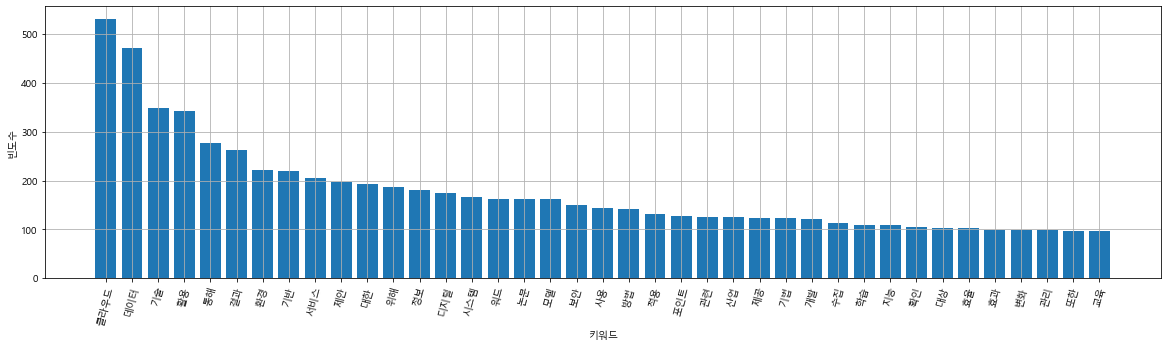

In [ ]:
plt.figure(figsize = (20, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()

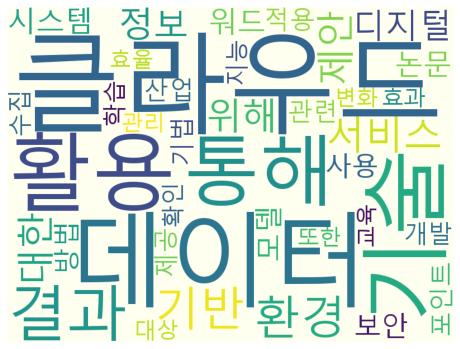

In [ ]:
wc = WordCloud( font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()